In [1]:
#Import necessary libraries
import requests
import sqlite3
import pandas as pd
from bs4 import BeautifulSoup

In [25]:
#Variables for parameters
url = 'https://web.archive.org/web/20230902185655/https://en.everybodywiki.com/100_Most_Highly-Ranked_Films'
db_name = 'Movies.db'
table_name = 'Top_50_films'
csv_path = '/home/project/top_50_films.csv'
df = pd.DataFrame(columns=["Average Rank","Film","Year"])
count = 0

<h3> Load data from Website <h3>

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head><script charset="utf-8" src="https://web-static.archive.org/_static/js/bundle-playback.js?v=t1Bf4PY_" type="text/javascript"></script>
<script charset="utf-8" src="https://web-static.archive.org/_static/js/wombat.js?v=txqj7nKC" type="text/javascript"></script>
<script>window.RufflePlayer=window.RufflePlayer||{};window.RufflePlayer.config={"autoplay":"on","unmuteOverlay":"hidden"};</script>
<script src="https://web-static.archive.org/_static/js/ruffle.js" type="text/javascript"></script>
<script type="text/javascript">
  __wm.init("https://web.archive.org/web");
  __wm.wombat("https://en.everybodywiki.com/100_Most_Highly-Ranked_Films","20230902185655","https://web.archive.org/","web","https://web-static.archive.org/_static/",
	      "1693681015");
</script>
<link href="https://web-static.archive.org/_static/css/banner-styles.css?v=S1zqJCYt" rel="stylesheet" type="text/css"/>
<link href="https://web-static.archive.org/
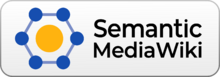

In [4]:
html_page = requests.get(url).text #get the content of webpage
#then turn it into BeautifulSoup instance
data = BeautifulSoup(html_page, "html.parser")

<h3> Inspect the Data Tables on the web <h3>

In [6]:
tables = data.find_all('tbody') #tbody stands for Table data on the web
tables

[<tbody><tr>
 <th>Average Rank</th>
 <th>Film</th>
 <th>Year</th>
 <th>Rotten Tomatoes' Top 100<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup></th>
 <th>IMDb's Top 250 <sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[2]</a></sup></th>
 <th>Empire's Top 100 <sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[3]</a></sup></th>
 <th>AFI's Top 100 <sup class="reference" id="cite_ref-4"><a href="#cite_note-4">[4]</a></sup></th>
 <th>BFI's Top 100 <sup class="reference" id="cite_ref-5"><a href="#cite_note-5">[5]</a></sup>
 </th></tr>
 <tr>
 <td>1</td>
 <td>The Godfather</td>
 <td>1972</td>
 <td>17</td>
 <td>2</td>
 <td>3</td>
 <td>2</td>
 <td>21
 </td></tr>
 <tr>
 <td>2</td>
 <td>Citizen Kane</td>
 <td>1941</td>
 <td>2</td>
 <td>93</td>
 <td>40</td>
 <td>1</td>
 <td>2
 </td></tr>
 <tr>
 <td>3</td>
 <td>Casablanca</td>
 <td>1942</td>
 <td>8</td>
 <td>42</td>
 <td>33</td>
 <td>3</td>
 <td>84
 </td></tr>
 <tr>
 <td>4</td>
 <td>The Godfather, 

In [7]:
rows = tables[0].find_all('tr')
rows

[<tr>
 <th>Average Rank</th>
 <th>Film</th>
 <th>Year</th>
 <th>Rotten Tomatoes' Top 100<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup></th>
 <th>IMDb's Top 250 <sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[2]</a></sup></th>
 <th>Empire's Top 100 <sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[3]</a></sup></th>
 <th>AFI's Top 100 <sup class="reference" id="cite_ref-4"><a href="#cite_note-4">[4]</a></sup></th>
 <th>BFI's Top 100 <sup class="reference" id="cite_ref-5"><a href="#cite_note-5">[5]</a></sup>
 </th></tr>,
 <tr>
 <td>1</td>
 <td>The Godfather</td>
 <td>1972</td>
 <td>17</td>
 <td>2</td>
 <td>3</td>
 <td>2</td>
 <td>21
 </td></tr>,
 <tr>
 <td>2</td>
 <td>Citizen Kane</td>
 <td>1941</td>
 <td>2</td>
 <td>93</td>
 <td>40</td>
 <td>1</td>
 <td>2
 </td></tr>,
 <tr>
 <td>3</td>
 <td>Casablanca</td>
 <td>1942</td>
 <td>8</td>
 <td>42</td>
 <td>33</td>
 <td>3</td>
 <td>84
 </td></tr>,
 <tr>
 <td>4</td>
 <td>The Godfather, Par

In [8]:
for row in rows:
    if count < 50: #set to 50 in order to retrieve the top 50
        col = row.find_all('td') #td means table data
        print(col) #we could see the first row is a blank list, so we need to set len(list) > 0

[]
[<td>1</td>, <td>The Godfather</td>, <td>1972</td>, <td>17</td>, <td>2</td>, <td>3</td>, <td>2</td>, <td>21
</td>]
[<td>2</td>, <td>Citizen Kane</td>, <td>1941</td>, <td>2</td>, <td>93</td>, <td>40</td>, <td>1</td>, <td>2
</td>]
[<td>3</td>, <td>Casablanca</td>, <td>1942</td>, <td>8</td>, <td>42</td>, <td>33</td>, <td>3</td>, <td>84
</td>]
[<td>4</td>, <td>The Godfather, Part II</td>, <td>1974</td>, <td>99</td>, <td>4</td>, <td>14</td>, <td>32</td>, <td>31
</td>]
[<td>5</td>, <td>Singin' in the Rain</td>, <td>1952</td>, <td>52</td>, <td>85</td>, <td>67</td>, <td>5</td>, <td>20
</td>]
[<td>6</td>, <td>Psycho</td>, <td>1960</td>, <td>88</td>, <td>32</td>, <td>81</td>, <td>14</td>, <td>35
</td>]
[<td>7</td>, <td>Rear Window</td>, <td>1954</td>, <td>47</td>, <td>49</td>, <td>72</td>, <td>48</td>, <td>53
</td>]
[<td>8</td>, <td>Apocalypse Now</td>, <td>1979</td>, <td>unranked</td>, <td>55</td>, <td>29</td>, <td>30</td>, <td>14
</td>]
[<td>9</td>, <td>2001: A Space Odyssey</td>, <td>1968<

In [17]:
for row in rows:
    if count < 50: #set to 50 in order to retrieve the top 50
        col = row.find_all('td')
        if len(col) != 0:
            data_dict ={"Average Rank": col[0].contents[0], #this dict stores data, like a DF
                        "Film" : col[1].contents[0],
                        "Year": col[2].contents[0]
            }
            df1 = pd.DataFrame(data_dict, index = [0]) #index =0 means not retrieve the index, so we could use ignore_index
            print(df1.head())

  Average Rank           Film  Year
0            1  The Godfather  1972
  Average Rank          Film  Year
0            2  Citizen Kane  1941
  Average Rank        Film  Year
0            3  Casablanca  1942
  Average Rank                    Film  Year
0            4  The Godfather, Part II  1974
  Average Rank                 Film  Year
0            5  Singin' in the Rain  1952
  Average Rank    Film  Year
0            6  Psycho  1960
  Average Rank         Film  Year
0            7  Rear Window  1954
  Average Rank            Film  Year
0            8  Apocalypse Now  1979
  Average Rank                   Film  Year
0            9  2001: A Space Odyssey  1968
  Average Rank           Film  Year
0           10  Seven Samurai  1954
  Average Rank     Film  Year
0           11  Vertigo  1958
  Average Rank         Film  Year
0           12  Sunset Blvd  1950
  Average Rank          Film  Year
0           13  Modern Times  1936
  Average Rank                Film  Year
0           14  Law

In [18]:
for row in rows:
    if count < 50: #set to 50 in order to retrieve the top 50
        col = row.find_all('td')
        if len(col) != 0:
            data_dict ={"Average Rank": col[0].contents[0], #this dict stores data, like a DF
                        "Film" : col[1].contents[0],
                        "Year": col[2].contents[0]
            }
            df1 = pd.DataFrame(data_dict, index = [0])
            df = pd.concat([df, df1], ignore_index = True)
            count +=1
    else:
        break

<h3> Load data

In [21]:
#to CSV
df.to_csv("top50Film.csv")

<h4> NOTE: Load to SQL Server

In [29]:
#Connect to SQL Server (with Window Authentication)
import sqlalchemy as sa
connection_uri = (
    "mssql+pyodbc://TEDPHO0134\TANDT_DP/Practice_Tan?driver=ODBC+Driver+17+for+SQL+Server"
)
conn = sa.create_engine(connection_uri)
# this is the engine to put data to SQL Server, notice the server name: TEDPHO0134\TANDT_DP
# and database: Practice_Tan

In [30]:
df.to_sql(table_name, conn, if_exists='replace', index=False)

0